<a href="https://colab.research.google.com/github/kartelmaks/ML/blob/master/SSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
from scipy import sparse
from scipy.sparse import csr_matrix, lil_matrix, diags
from scipy.sparse.linalg import spsolve

In [2]:
#from google.colab import files
#uploaded = files.upload()


In [3]:
#X = pd.read_csv('data1.csv', header = None).transpose()

##Герерація спетру

In [4]:
N = 1024
r_max = 100

M = [0, 10, 20]
sig_p = [5, 10, 5, 20, 15]
I = [0.9, 1, 0.8, 0.6, 0.75]
p = [100, 250, 500, 750, 900] 


In [5]:
def get_spectr(m):
  f = list()
  for k in range(N):
    f.append(1500*np.exp(-k/300) + 200)
  f = np.array(f)
  f = f*0.1

  R_sum = np.zeros(N)
  for i in range(5):
    r_sum = list()
    for k in range(N):
      r_sum.append(I[i]*np.exp((-(k+m-p[i])**2)/(2*sig_p[i]**2)))
    R_sum = [x + y for x, y in zip(R_sum, r_sum)]
  R_sum = np.array(R_sum)
  R_sum = r_max*R_sum
  R_F = [x + y for x, y in zip(R_sum, f)]
  return R_F

(3, 1024)


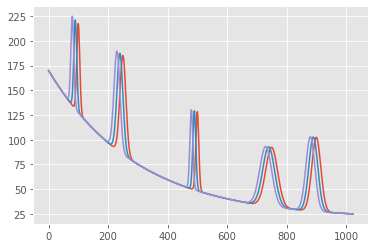

In [6]:
R = list()
for i in range(len(M)):
  R.append(get_spectr(M[i]))
R = np.array(R)
print(R.shape )

X_ = pd.DataFrame(R)
for i in range(len(X_)):
    Y_axis = np.array(X_.iloc[i,:], dtype = np.float32)
    X_axis = np.array(range(N))
    plt.plot(X_axis, Y_axis)
plt.show()



In [7]:
'''l1 = 400
l2 = 1340
X = X.iloc[:,l1:l2]
X.columns = range(l2-l1)
m, k = X.shape
print(m, k)
px.line(x = range(940), y = X.iloc[0])
shift = [0, 10, 20]'''

'l1 = 400\nl2 = 1340\nX = X.iloc[:,l1:l2]\nX.columns = range(l2-l1)\nm, k = X.shape\nprint(m, k)\npx.line(x = range(940), y = X.iloc[0])\nshift = [0, 10, 20]'

# Матричний метод

In [8]:
m, N = R.shape
shift = M

початкові наближення раману та флюрика

In [9]:
R_ = pd.DataFrame(R)
R_mean = R_.mean()

In [10]:
R_m_s = np.zeros(N)
for i in range(N):
  R_m_s[i] = ((R_[i] - R_mean[i])**2).mean()
S_r = np.sqrt(R_m_s)

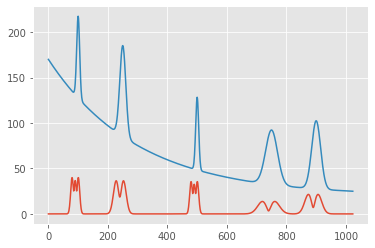

In [11]:
plt.plot(S_r)
plt.plot(R[0])


In [12]:
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

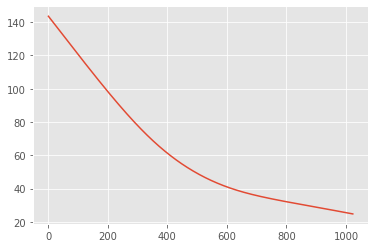

In [13]:
S_f = baseline_als(R_mean, 100000000, 0.05)

plt.plot(S_f)

In [14]:
I_arr = list()
E_arr = list()
E = diags([1], [0], shape=(N,N), dtype=float)

for r in range(m):
    I = diags([1], [-shift[r]], shape=(N,N), dtype=float)
    I_arr.append(I)
    
for r in range(m):
    E_arr.append(E)

H = [I_arr, E_arr]
H = np.array(H).T

In [15]:
def multiply_sparse(A, B):
  l, m = A.shape
  n = B.shape
  #print(l, m, n)
  x = pd.DataFrame()

  for i in range(l):    
    s = np.zeros(N)
    for r in range(m):
      w = (A[i][r] * B[r].T).toarray()
      s = [x + y for x, y in zip(s, w)]
            
    s = pd.DataFrame(s).transpose()
    x = x.append(s)
  x = np.array(x)
  return x

     

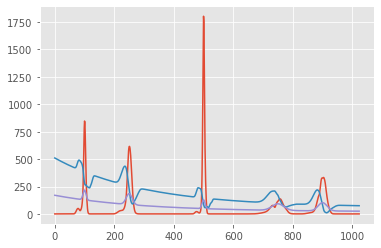

In [19]:
S_f_ = lil_matrix(S_f)
S_r_ = lil_matrix(S_r)
S = np.array([S_r_, S_f_])
for i in range(10):
  hs = multiply_sparse(H, S)
  r_hs = (R/hs)
  #print(r_hs[0])
  r_hs = np.array([lil_matrix(r_hs[0]), lil_matrix(r_hs[1]), lil_matrix(r_hs[2])])
  ss = multiply_sparse(H.T, r_hs)
  S = np.array((lil_matrix(S[0].toarray()*ss[0]), lil_matrix(S[1].toarray()*ss[1])))
plt.plot(S[0].toarray().T)
plt.plot(S[1].toarray().T)
plt.plot(R[0])


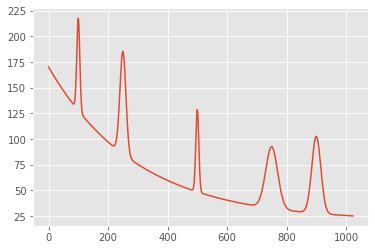

In [20]:
plt.plot(R[0])

In [18]:
X_ = pd.DataFrame(x)
for i in range(len(X_)):
    Y_axis = np.array(X_.iloc[i,:], dtype = np.float32)
    plt.plot(Y_axis)
plt.show()

NameError: ignored

# NNLS

In [ ]:
from scipy.optimize import nnls

In [ ]:
I_arr1 = list()
E_arr1 = list()
E1 = np.diag(np.ones(k))

for r in range(m):
    I1 = np.diag(np.ones(k), k = -shift[r])
    I_arr1.append(I1)
    
for r in range(m):
    E_arr1.append(E1)

A1 = [I_arr1, E_arr1]

In [ ]:
X[0]

In [ ]:
R = list()
R.append(X.iloc[0])
R.append(X.iloc[1])
R.append(X.iloc[2])
R = np.array(R)
R.shape

In [ ]:
A1 = np.array(A)
R = np.array(R)

In [ ]:
R.shape

In [ ]:
X = nnls(A1, R)

In [ ]:
S